**1. Single Transform: Apply rotation of 45° to a triangle centered at origin. Record new vertex coordinates. Show steps (matrix multiplication).**

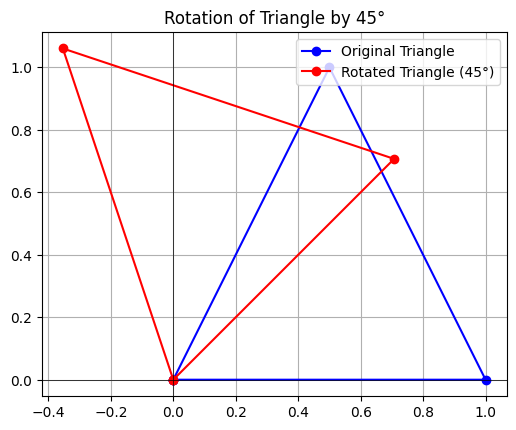

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def rotate(points, angle):
    rad = np.radians(angle)
    R = np.array([[np.cos(rad), -np.sin(rad), 0],
                  [np.sin(rad),  np.cos(rad), 0],
                  [0, 0, 1]])
    return (R @ points.T).T

# Original triangle vertices in homogeneous coordinates
triangle = np.array([[0, 0, 1],
                     [1, 0, 1],
                     [0.5, 1, 1],
                     [0, 0, 1]])  # closed shape (repeat first point)

# Rotate 45 degrees
rotated_triangle = rotate(triangle, 45)

# Plot
plt.figure(figsize=(6,6))
plt.plot(triangle[:,0], triangle[:,1], 'b-o', label='Original Triangle')
plt.plot(rotated_triangle[:,0], rotated_triangle[:,1], 'r-o', label='Rotated Triangle (45°)')

# Axes settings
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.title("Rotation of Triangle by 45°")
plt.grid(True)
plt.show()



**2. Order Matters: Demonstrate that scaling then translation ≠ translation then scaling. Pick a rectangle and show coordinates of both orders. Explain result.**

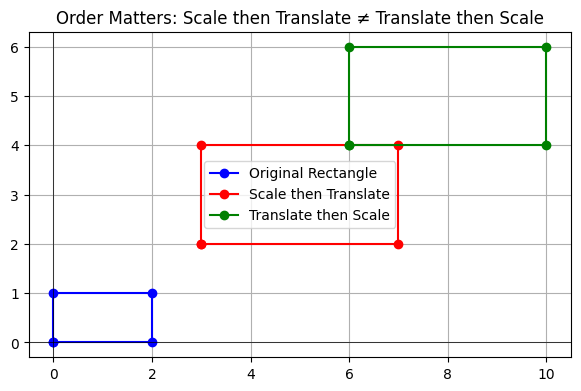

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def translate(points, tx, ty):
    T = np.array([[1, 0, tx],
                  [0, 1, ty],
                  [0, 0, 1]])
    return (T @ points.T).T

def scale(points, sx, sy):
    S = np.array([[sx, 0, 0],
                  [0, sy, 0],
                  [0, 0, 1]])
    return (S @ points.T).T

# Rectangle vertices (closed shape for plotting)
rectangle = np.array([[0,0,1],
                      [2,0,1],
                      [2,1,1],
                      [0,1,1],
                      [0,0,1]])

# Case 1: Scale then Translate
scaled = scale(rectangle, 2, 2)
scaled_then_translated = translate(scaled, 3, 2)

# Case 2: Translate then Scale
translated = translate(rectangle, 3, 2)
translated_then_scaled = scale(translated, 2, 2)

# Plot
plt.figure(figsize=(7,7))

# Original
plt.plot(rectangle[:,0], rectangle[:,1], 'b-o', label="Original Rectangle")

# Scale → Translate
plt.plot(scaled_then_translated[:,0], scaled_then_translated[:,1], 'r-o', label="Scale then Translate")

# Translate → Scale
plt.plot(translated_then_scaled[:,0], translated_then_scaled[:,1], 'g-o', label="Translate then Scale")

# Axes
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.title("Order Matters: Scale then Translate ≠ Translate then Scale")
plt.grid(True)
plt.show()


**3. Combined Transform: Using sliders, set a combination that maps the triangle into aregion near (2, -1) that is twice larger and rotated by -30°. Write the composed transform matrix and final coordinates.**

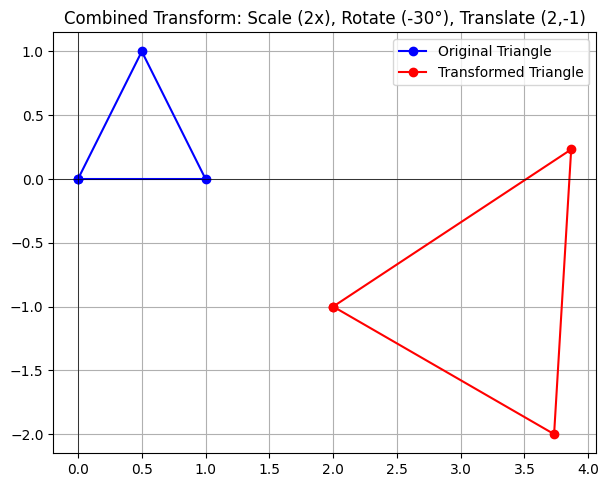

Combined Transform Matrix:
 [[ 1.73205081  1.          2.        ]
 [-1.          1.73205081 -1.        ]
 [ 0.          0.          1.        ]]

Final Transformed Triangle Coordinates:
 [[ 2.         -1.          1.        ]
 [ 3.73205081 -2.          1.        ]
 [ 3.8660254   0.23205081  1.        ]
 [ 2.         -1.          1.        ]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Original triangle vertices (closed shape for plotting)
triangle = np.array([[0, 0, 1],
                     [1, 0, 1],
                     [0.5, 1, 1],
                     [0, 0, 1]])

# Scaling matrix (2x larger)
S = np.array([[2,0,0],
              [0,2,0],
              [0,0,1]])

# Rotation matrix (-30° clockwise)
rad = np.radians(-30)
R = np.array([[np.cos(rad), -np.sin(rad), 0],
              [np.sin(rad),  np.cos(rad), 0],
              [0,0,1]])

# Translation matrix (shift to near (2,-1))
T = np.array([[1,0,2],
              [0,1,-1],
              [0,0,1]])

# Combined transformation: Scale → Rotate → Translate
M = T @ R @ S

# Apply to triangle
triangle_transformed = (M @ triangle.T).T

# Plotting
plt.figure(figsize=(7,7))

# Original
plt.plot(triangle[:,0], triangle[:,1], 'b-o', label="Original Triangle")

# Transformed
plt.plot(triangle_transformed[:,0], triangle_transformed[:,1], 'r-o', label="Transformed Triangle")

# Axes & formatting
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.title("Combined Transform: Scale (2x), Rotate (-30°), Translate (2,-1)")
plt.grid(True)
plt.show()

# Print outputs
print("Combined Transform Matrix:\n", M)
print("\nFinal Transformed Triangle Coordinates:\n", triangle_transformed)


**4. Extra: Implement shear matrix and observe effect (optional).**

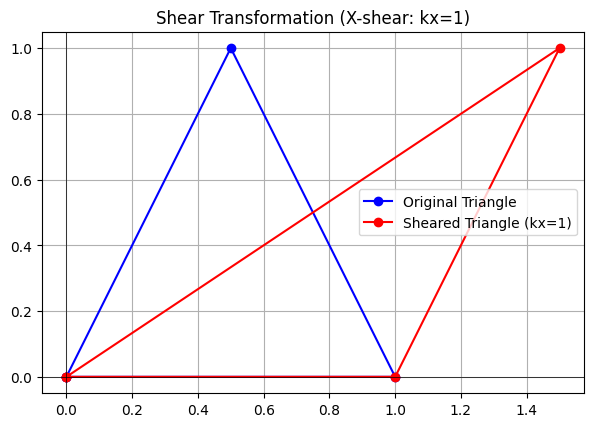

Original Triangle:
 [[0.  0.  1. ]
 [1.  0.  1. ]
 [0.5 1.  1. ]
 [0.  0.  1. ]]

Sheared Triangle (kx=1):
 [[0.  0.  1. ]
 [1.  0.  1. ]
 [1.5 1.  1. ]
 [0.  0.  1. ]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def shear(points, kx=0, ky=0):
    Sh = np.array([[1, kx, 0],
                   [ky, 1, 0],
                   [0, 0, 1]])
    return (Sh @ points.T).T

# Original triangle (closed shape for plotting)
triangle = np.array([[0, 0, 1],
                     [1, 0, 1],
                     [0.5, 1, 1],
                     [0, 0, 1]])

# Apply shear (X-shear: kx=1, ky=0)
sheared_triangle = shear(triangle, kx=1, ky=0)

# Plotting
plt.figure(figsize=(7,7))

# Original triangle
plt.plot(triangle[:,0], triangle[:,1], 'b-o', label="Original Triangle")

# Sheared triangle
plt.plot(sheared_triangle[:,0], sheared_triangle[:,1], 'r-o', label="Sheared Triangle (kx=1)")

# Axes & formatting
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.title("Shear Transformation (X-shear: kx=1)")
plt.grid(True)
plt.show()

# Print coordinates
print("Original Triangle:\n", triangle)
print("\nSheared Triangle (kx=1):\n", sheared_triangle)
